In [1]:
import numpy as np
from numpy import arange
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import math

# Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

# Regressors

from xgboost import XGBClassifier

# Validation

from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, explained_variance_score, balanced_accuracy_score

# Data pre-processing Libraries

import miceforest as miceforest
from sklearn.preprocessing import StandardScaler

# Other libraries

import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv') 

In [3]:
data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- The data contains several features related to heart attck prediction.
- The target variable has values [0,1] which means no risk and definite risk respectively

In [4]:
X = data.drop(columns = ['target'])
y = data['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) # test-train split

### XGBoost model

In [6]:
model = XGBClassifier() #XGBoost model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Accuracy

In [7]:
y_pred = model.predict(X_test)
print('Accuracy Score = ', round(accuracy_score(y_test, y_pred)*100, 3), '%')
print('Balanced Accuracy Score = ', round(balanced_accuracy_score(y_test, y_pred)*100, 1), '%')

Accuracy Score =  100.0 %
Balanced Accuracy Score =  100.0 %


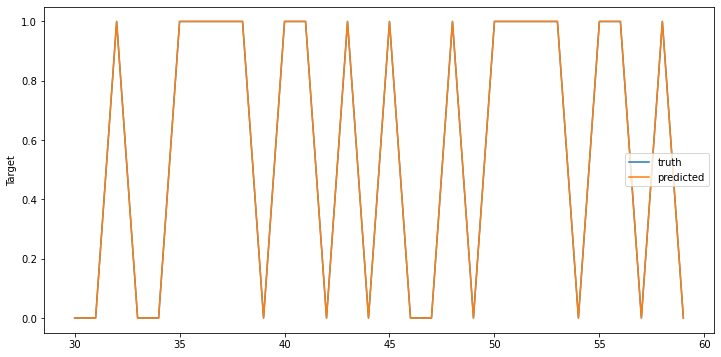

In [8]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

a = 30
b = 60
plt.plot([a+i for i in range(len(y_test[a:b]))], y_test[a:b])
plt.plot([a+i for i in range(len(y_test[a:b]))], y_pred[a:b])
plt.legend(['truth','predicted'])
plt.ylabel('Target')
plt.show()